# Libraries and File

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



```%sq1l
select * from the view of DFORE350
```



In [ ]:
df= pd.read_csv('/content/DFORE339.csv', low_memory=False)

In [ ]:
df.shape

(102836, 41)

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

location_id                     21
Location_Name                   26
Branch_Id                     3081
Branch_Name                   3081
state                          218
Daily_Max_Room_Vend_Hours        2
Total_Vend_Hours                 2
Overall_Utilization              2
Daily_Peak_Utilization           2
Full_Room_Util_Gross_Hours     585
Full_Room_Util_Vend_PCT        585
Full_Room_Util_Total_PCT       585
AvgUtil_T                        1
AvgUtil_Sa                       1
nrpm                          3491
ContractExpirationDate        1496
Days_To_ContractExpiration    1496
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(96568, 41)

In [ ]:
df.head()

,Reporting_level,vendor,as400id,location_id,Location_Name,Branch_Id,Branch_Name,state,room_id,machine_type,...,AvgUtil_M,AvgUtil_T,AvgUtil_W,AvgUtil_Th,AvgUtil_F,AvgUtil_Sa,AvgUtil_Su,nrpm,ContractExpirationDate,Days_To_ContractExpiration
0,Room,DI,600221,8306,EXETER AT CENTURY VILLAGE,6.0,Miami,Florida,DI-8306-22,DRYER,...,10.9668,9.8601,15.1933,12.4000,17.1515,24.8860,12.3776,25.70,2022-07-24 00:00:00.000,145.0
1,Room,CSCGo,1811446,9302a37d-d1ed-4659-b96d-900a5e5e665f,COLONIAL PARK APTS,18.0,Memphis,AR,CG-9302a37d-d1ed-4659-b96d-900a5e5e665f-181144...,WASHER,...,3.6759,3.5087,6.6666,3.5521,7.5925,4.4629,9.3611,59.00,2023-03-09 00:00:00.000,373.0
2,Room,DI,34479,5788,JEFFERSON SQUARE CONDO,2.0,Balt/Wash,Maryland,DI-5788-4,DRYER,...,7.6923,5.0000,9.1076,10.8307,5.0836,6.7692,9.8785,40.69,2027-04-05 00:00:00.000,1861.0
3,Room,CSCGo,53063,ed86bb7e-eead-432f-b09f-f530160a8dc4,LADERA APTS,15.0,Dallas,TX,CG-ed86bb7e-eead-432f-b09f-f530160a8dc4-53063-001,WASHER,...,4.8148,8.5300,3.8981,2.6712,7.0023,16.6898,3.4953,35.02,2025-08-11 00:00:00.000,1259.0
4,Room,DI,220554,11453,GRADUATE HILLS,2.0,Balt/Wash,Maryland,DI-11453-5,DRYER,...,4.6928,4.6760,3.8113,5.1072,5.4220,7.2662,9.7080,21.41,2026-03-31 00:00:00.000,1491.0


# Variables of Interest

## Recency Measure

In [ ]:
df['UtilTimeFrame']= (df.TimeSinceFirstVend- df.TimeSinceLastTxn)/(df.TimeSinceFirstVend+1)

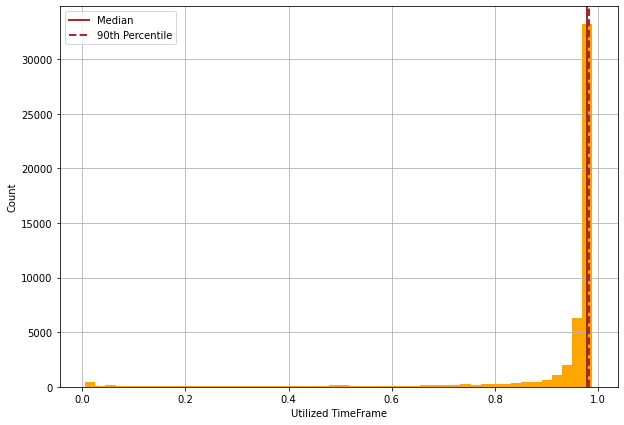

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,count,mean,std,min,5%,10%,20%,40%,50%,60%,80%,90%,max
UtilTimeFrame,96568.0,0.926654,0.166484,0.005525,0.624241,0.881356,0.95538,0.972376,0.977778,0.977901,0.977901,0.983425,0.98895


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['UtilTimeFrame'].mean().hist(color='orange', bins=50,log=False, histtype='bar')
plt.xlabel('Utilized TimeFrame')
plt.ylabel('Count')
# plt.axvline(df.UtilTimeFrame.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.UtilTimeFrame.median(), color='brown', linestyle='solid', linewidth=2, label= 'Median')
# plt.axvline(df.UtilTimeFrame.describe().loc['25%'], color='brown', linestyle='dashed', linewidth=1)
plt.axvline(df.UtilTimeFrame.describe(percentiles=[0.9]).loc['90%'], color='brown', linestyle='dashed', linewidth=2, label= '90th Percentile')
# plt.axvline(df.UtilTimeFrame.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df.UtilTimeFrame.describe(percentiles=[.05,.1,.2,.4,.6,.8,.9]).reset_index().T

<function matplotlib.pyplot.show>

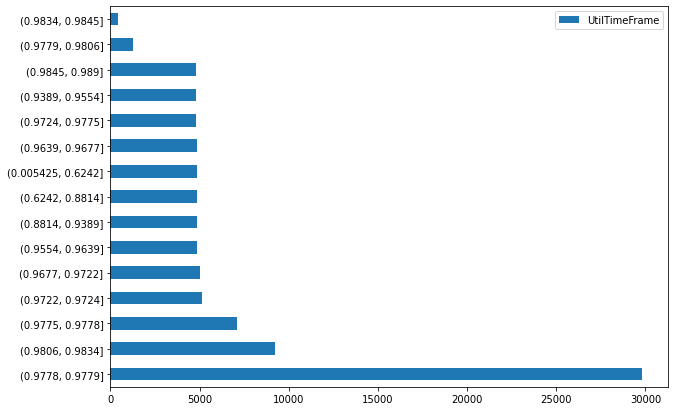

In [ ]:
pd.qcut(df.UtilTimeFrame, 20, duplicates='drop').value_counts(dropna= False).plot(kind='barh', figsize=(10,7))
plt.legend()
plt.show

In [ ]:
p90=df.UtilTimeFrame.describe(percentiles=[.9]).loc['90%']
df['UtilTimeFrame_bkt']= np.where(df["UtilTimeFrame"] <p90, 1,0)

In [ ]:
df.UtilTimeFrame_bkt.value_counts(dropna= False)

1    85766
0    10802
Name: UtilTimeFrame_bkt, dtype: int64

## Machine Count

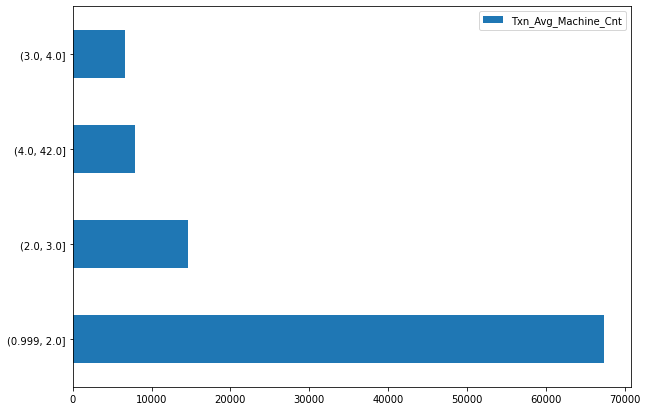

In [ ]:
pd.qcut(df.Txn_Avg_Machine_Cnt, 10, duplicates='drop').value_counts(dropna= False).plot(kind='barh', figsize=(10,7))
plt.legend()
plt.show()

In [ ]:
pd.qcut(df.Txn_Avg_Machine_Cnt, 10, duplicates='drop')

0         (0.999, 2.0]
1         (0.999, 2.0]
2         (0.999, 2.0]
3           (2.0, 3.0]
4           (3.0, 4.0]
              ...     
102831    (0.999, 2.0]
102832      (3.0, 4.0]
102833      (3.0, 4.0]
102834    (0.999, 2.0]
102835    (0.999, 2.0]
Name: Txn_Avg_Machine_Cnt, Length: 96568, dtype: category
Categories (4, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 42.0]]

In [ ]:
df.Txn_Avg_Machine_Cnt.describe(percentiles=[.5])

count    96568.000000
mean         2.344503
std          1.768549
min          1.000000
50%          2.000000
max         42.000000
Name: Txn_Avg_Machine_Cnt, dtype: float64

In [ ]:
p50= df.Txn_Avg_Machine_Cnt.describe(percentiles=[.5])['50%']
df['machine_bkt']= np.where(df["Txn_Avg_Machine_Cnt"] <p50, 0,1)

In [ ]:
df.Txn_Avg_Machine_Cnt.describe(percentiles=[.8,.9])

count    96568.000000
mean         2.344503
std          1.768549
min          1.000000
50%          2.000000
80%          3.000000
90%          4.000000
max         42.000000
Name: Txn_Avg_Machine_Cnt, dtype: float64

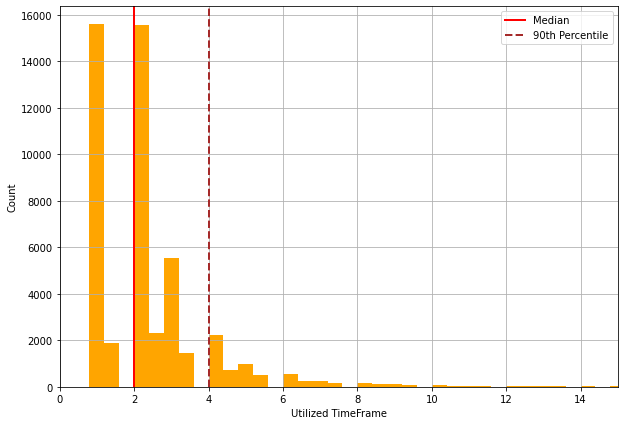

,0,1,2,3,4,5,6,7,8,9
index,count,mean,std,min,5%,25%,50%,75%,90%,max
Txn_Avg_Machine_Cnt,96568.0,2.344503,1.768549,1.0,1.0,1.0,2.0,3.0,4.0,42.0


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['Txn_Avg_Machine_Cnt'].median().hist(color='orange', bins=50,log=False, histtype='bar', range=[0,20])
plt.xlim(0, 15)
plt.xlabel('Utilized TimeFrame')
plt.ylabel('Count')
# plt.axvline(df.Txn_Avg_Machine_Cnt.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.Txn_Avg_Machine_Cnt.median(), color='red', linestyle='solid', linewidth=2, label= 'Median')
plt.axvline(df.Txn_Avg_Machine_Cnt.describe(percentiles=[.9]).loc['90%'], color='brown', linestyle='dashed', linewidth=2, label='90th Percentile')
# plt.axvline(df.Txn_Avg_Machine_Cnt.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Txn_Avg_Machine_Cnt.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df.Txn_Avg_Machine_Cnt.describe(percentiles=[.05,.25,.5,.75,.9]).reset_index().T

## Overall Utilization

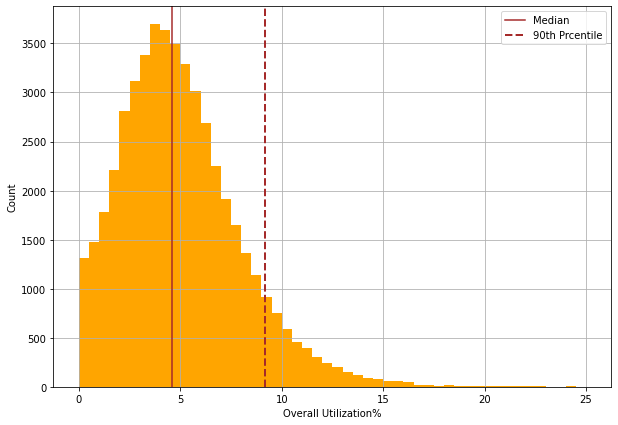

,0,1,2,3,4,5,6
index,count,mean,std,min,50%,90%,max
Overall_Utilization,96568.0,5.070966,3.18345,0.02,4.57,9.19,47.78


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['Overall_Utilization'].median().hist(color='orange', bins=50,log=False, histtype='bar', range=[0,25])
plt.xlabel('Overall Utilization%')
plt.ylabel('Count')
# plt.axvline(df.Overall_Utilization.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.Overall_Utilization.median(), color='brown', linestyle='solid', linewidth=1.5, label= 'Median')
plt.axvline(df.Overall_Utilization.describe(percentiles=[.9]).loc['90%'], color='brown', linestyle='dashed', linewidth=2, label= '90th Prcentile')
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df.Overall_Utilization.describe(percentiles=[.90]).reset_index().T

In [ ]:
p90= df.Overall_Utilization.describe(percentiles=[.9])['90%']
df['overall_util_bkt']= np.where(df["Overall_Utilization"] <p90, 1,0)

## Peak Utilization

In [ ]:
p80= df.Daily_Peak_Utilization.describe(percentiles=[.8])['80%']
df['peak_util_bkt']= np.where(df['Daily_Peak_Utilization']< p80,1,0)

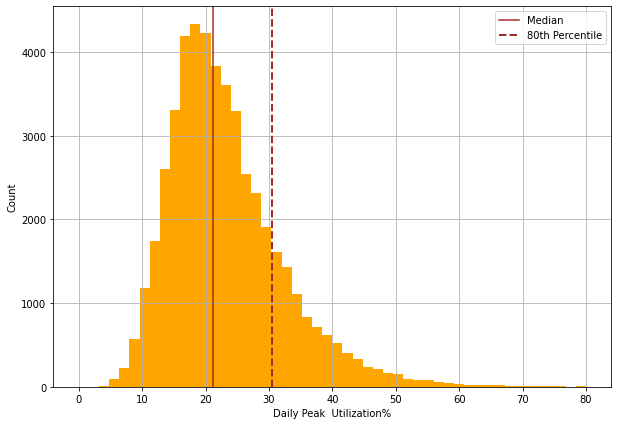

,0,1,2,3,4,5,6
index,count,mean,std,min,50%,80%,max
Overall_Utilization,96568.0,5.070966,3.18345,0.02,4.57,7.38,47.78


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['Daily_Peak_Utilization'].mean().hist(color='orange', bins=50,log=False, histtype='bar', range=[0,80])
plt.xlabel('Daily Peak  Utilization%')
plt.ylabel('Count')
# plt.axvline(df.Daily_Peak_Utilization.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.Daily_Peak_Utilization.median(), color='brown', linestyle='solid', linewidth=1.5, label= 'Median')
plt.axvline(df.Daily_Peak_Utilization.describe(percentiles=[.8]).loc['80%'], color='brown', linestyle='dashed', linewidth=2, label= '80th Percentile')
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df.Overall_Utilization.describe(percentiles=[.80]).reset_index().T

In [ ]:
df[['Overall_Utilization', 'Daily_Peak_Utilization']].describe(percentiles=[.8,.9])

,Overall_Utilization,Daily_Peak_Utilization
count,96568.000000,96568.000000
mean,5.070966,23.256206
std,3.183450,10.369060
min,0.020000,2.380952
50%,4.570000,21.152320
80%,7.380000,30.416663
90%,9.190000,36.736108
max,47.780000,100.000000


## NRPM

In [ ]:
p1= df.nrpm.describe(percentiles=[.01,.25,.50,.75,.99]).loc['1%']
p99= df.nrpm.describe(percentiles=[.01,.25,.50,.75,.99]).loc['99%']

In [ ]:
df["nrpm"] = np.where(df["nrpm"] <p1, p1,df['nrpm'])
# df["nrpm"] = np.where(df["nrpm"] >p99, p1,df['nrpm'])

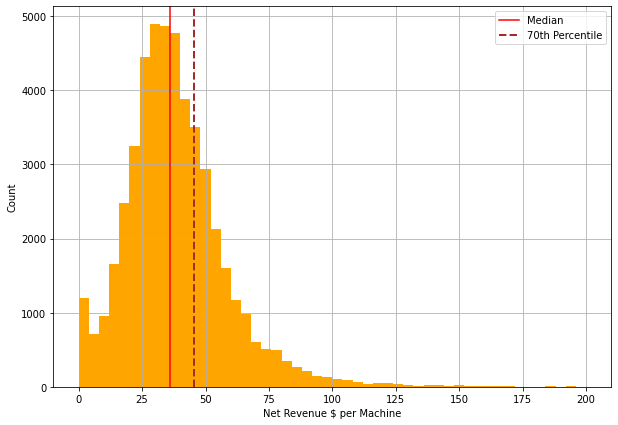

,0,1,2,3,4,5,6
index,count,mean,std,min,50%,70%,max
nrpm,96568.0,39.143966,23.636261,0.0,36.13,45.52,802.51


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['nrpm'].mean().hist(color='orange', bins=50,log=False, histtype='bar', range=[0,200])
plt.xlabel('Net Revenue $ per Machine')
plt.ylabel('Count')
# plt.axvline(df.nrpm.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.nrpm.median(), color='red', linestyle='solid', linewidth=1.5, label= 'Median')
plt.axvline(df.nrpm.describe(percentiles=[.7]).loc['70%'], color='brown', linestyle='dashed', linewidth=2, label= '70th Percentile')
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df.nrpm.describe(percentiles=[.70]).reset_index().T

In [ ]:
p70= df.nrpm.describe(percentiles=[.7])['70%']
df['nrpm_bkt']= np.where(df['nrpm']< p70,1,0)

## VPDM

In [ ]:
p70= df.VDPM.describe(percentiles=[.7])['70%']
df['VDPM_bkt']= np.where(df['VDPM']< p70,1,0)

In [ ]:
# p1=df.VDPM.describe(percentiles=[.01,.25,.50,.75,.99]).loc['1%']
# p99= df.VDPM.describe(percentiles=[.01,.25,.50,.75,.99]).loc['99%']
# df["VDPM"] = np.where(df["VDPM"] <p1, p1,df['VDPM'])
# df["VDPM"] = np.where(df["VDPM"] >p99, p99,df['VDPM'])

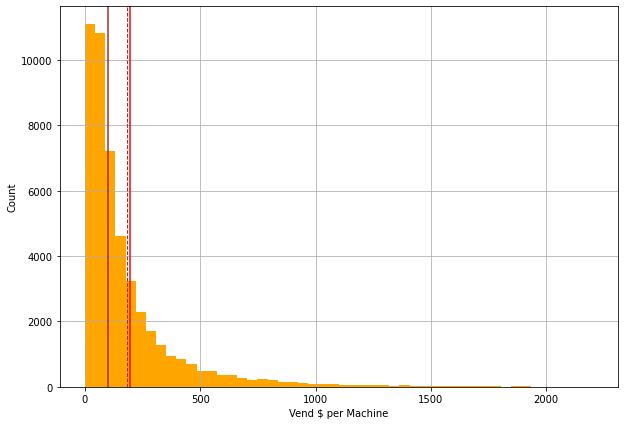

,0,1,2,3,4,5,6
index,count,mean,std,min,50%,70%,max
VDPM,96568.0,194.651333,336.95776,0.0,101.61125,182.390715,17372.93805


In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_id'])['VDPM'].mean().hist(color='orange', bins=50,log=False, histtype='bar',range=[0,2200])
plt.xlabel('Vend $ per Machine')
plt.ylabel('Count')
plt.axvline(df.VDPM.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.VDPM.median(), color='brown', linestyle='solid', linewidth=1.5)
plt.axvline(df.VDPM.describe(percentiles=[.7]).loc['70%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.show()
df.VDPM.describe(percentiles=[.70]).reset_index().T

##VDPM versus Overall Utilization

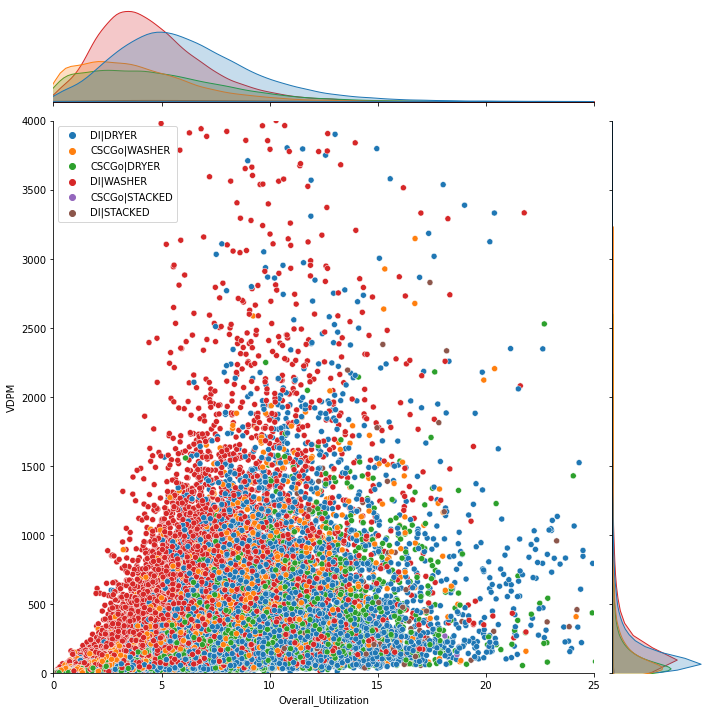

In [ ]:
sns.jointplot(x= df.Overall_Utilization, y=df.VDPM,height=10, hue= df.vendor+'|'+df.machine_type, ylim=(0,4000), xlim=(0,25))

## VDPM vs nrpm

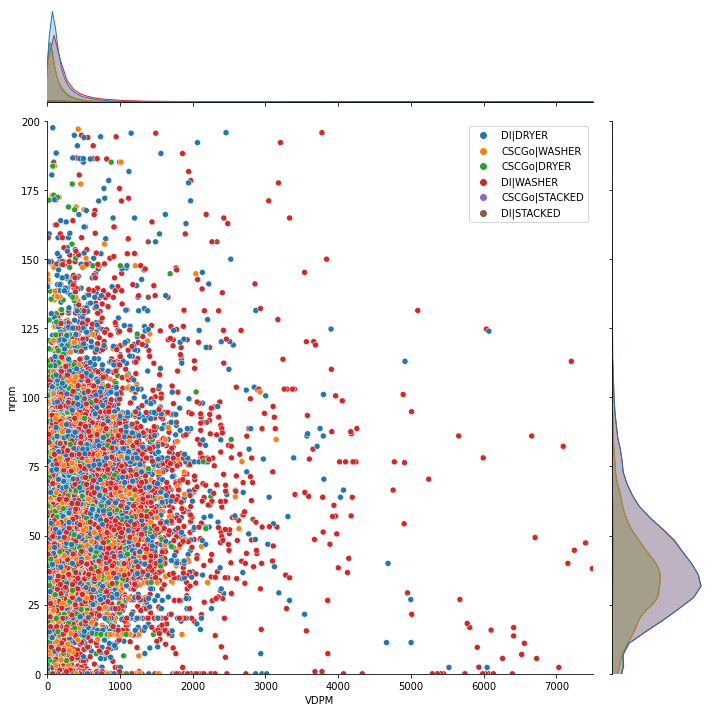

In [ ]:
sns.jointplot(x= df.VDPM, y=df.nrpm,height=10, hue= df.vendor+'|'+df.machine_type, xlim=(0,7500), ylim=(0,200))

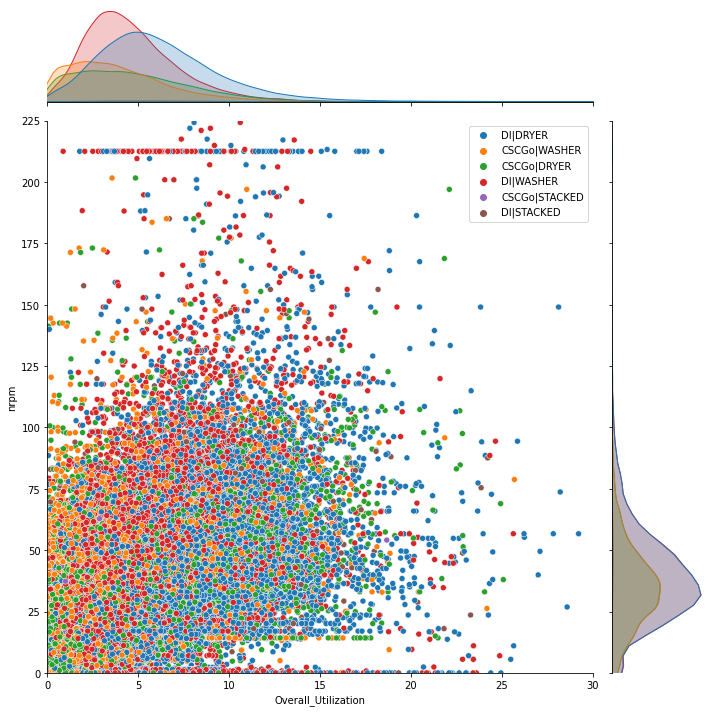

In [ ]:
sns.jointplot(x= df.Overall_Utilization, y=df.nrpm,height=10, hue= df.vendor+'|'+df.machine_type, xlim=(0,30), ylim=(0,225))

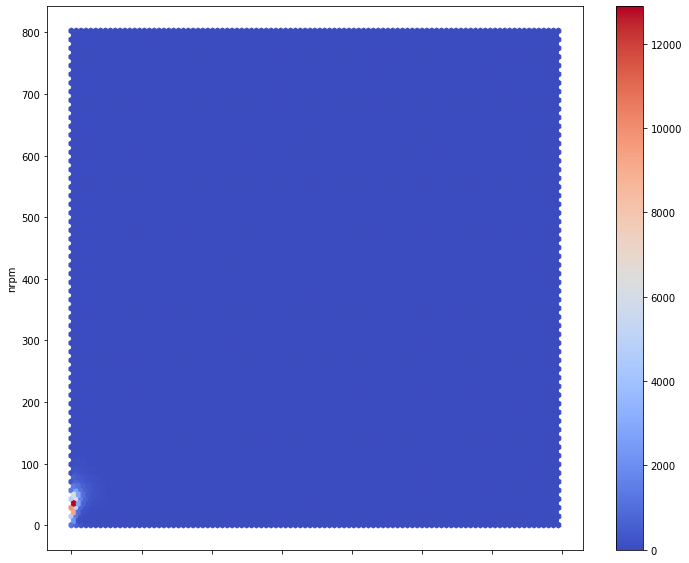

In [ ]:
# plt.figure(figsize=(10,7))
df.plot(x='VDPM', y='nrpm', kind='hexbin', figsize=(12,10), colormap='coolwarm')

## Variable Correlation

In [ ]:
df.columns

Index(['Reporting_level', 'vendor', 'as400id', 'location_id', 'Location_Name',
       'Branch_Id', 'Branch_Name', 'state', 'room_id', 'machine_type',
       'TimeSinceFirstVend', 'TimeSinceLastTxn', 'Tenure_Flag',
       'Txn_Avg_Machine_Cnt', 'Room_Open_Hours', 'Daily_Max_Room_Vend_Hours',
       'Base_Vends', 'Base_Vend_Amount', 'Top_Up_Vends', 'Top_Up_Vend_Amount',
       'Total_Vend_Hours', 'Total_Hours_Open', 'Overall_Utilization',
       'Max_Daily_Vends', 'Daily_Peak_Utilization',
       'Full_Room_Util_Gross_Hours', 'Full_Room_Util_Vend_PCT',
       'Full_Room_Util_Total_PCT', 'Avg_Daily_Vends', 'VDPM', 'Vend_Price',
       'AvgUtil_M', 'AvgUtil_T', 'AvgUtil_W', 'AvgUtil_Th', 'AvgUtil_F',
       'AvgUtil_Sa', 'AvgUtil_Su', 'nrpm', 'ContractExpirationDate',
       'Days_To_ContractExpiration', 'UtilTimeFrame', 'UtilTimeFrame_bkt',
       'machine_bkt', 'overall_util_bkt', 'peak_util_bkt', 'nrpm_bkt',
       'VDPM_bkt'],
      dtype='object')

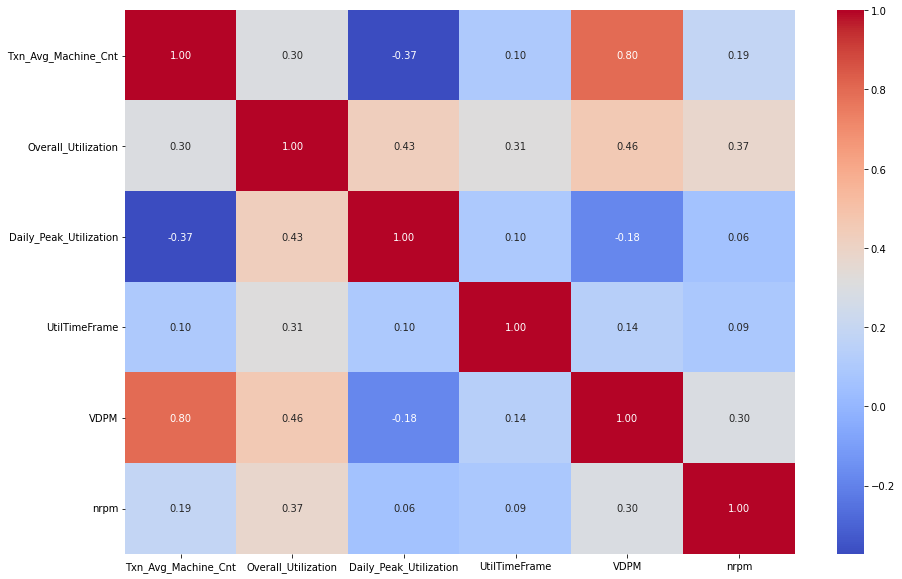

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.loc[:, ['Txn_Avg_Machine_Cnt', 'Overall_Utilization', 'Daily_Peak_Utilization', 'UtilTimeFrame', 'VDPM', 'nrpm']].corr(), fmt='.2f', cmap= 'coolwarm', annot=True)

## Segments

In [ ]:
df.Tenure_Flag= df.Tenure_Flag.map({'New':0, 'Tenured':1})

In [ ]:
multipliers= {'Tenure_Flag': 1000, 'UtilTimeFrame_bkt': 100,'machine_bkt': 10, 'nrpm_bkt':1}

In [ ]:
df['score']=df.Tenure_Flag*1000+ df.UtilTimeFrame_bkt*100+ df.machine_bkt*10+ df.nrpm_bkt

In [ ]:
df.groupby('score').agg({'room_id': 'nunique', 'Txn_Avg_Machine_Cnt': 'sum'}).sort_index(ascending= False)

,room_id,Txn_Avg_Machine_Cnt
score,,
1111,19361,96355
1110,9241,58784
1101,12909,22960
1100,4054,7093
1011,3562,18878
1010,2151,14408
1001,720,1016
1000,290,419
111,703,3640


In [ ]:
df.loc[df.score==1111].groupby(['vendor', 'machine_type'])['Txn_Avg_Machine_Cnt'].sum().reset_index()

,vendor,machine_type,Txn_Avg_Machine_Cnt
0,CSCGo,DRYER,14095
1,CSCGo,STACKED,34
2,CSCGo,WASHER,15021
3,DI,DRYER,32546
4,DI,STACKED,160
5,DI,WASHER,34499


# RghtSizing

## Median Utilization

In [ ]:
def q90(x):
  return(x.quantile(0.9))

In [ ]:
mf= df.groupby(['vendor', 'machine_type']).agg({'Overall_Utilization': 'median', 'Daily_Peak_Utilization': [q90]}).reset_index()

In [ ]:
mf.columns= ['vendor', 'machine_type', 'Overall_Utilization_median', 'Daily_Peak_Utilization_q90']

In [ ]:
df.loc[df.score==1111].groupby(['vendor', 'machine_type']).agg({'Overall_Utilization': ['median','max'], 'Daily_Peak_Utilization': [q90]}).reset_index()

vendor machine_type Overall_Utilization        Daily_Peak_Utilization
                                   median    max                    q90
0  CSCGo        DRYER                3.05  24.05              30.534722
1  CSCGo      STACKED                1.48   3.73              23.641304
2  CSCGo       WASHER                2.52  18.01              25.416667
3     DI        DRYER                4.86  28.59              33.333333
4     DI      STACKED                6.43  16.45              36.413689
5     DI       WASHER                3.60  24.88              25.833333

In [ ]:
mf

,vendor,machine_type,Overall_Utilization_median,Daily_Peak_Utilization_q90
0,CSCGo,DRYER,4.290,36.339583
1,CSCGo,STACKED,1.445,31.250000
2,CSCGo,WASHER,3.390,30.312500
3,DI,DRYER,5.700,41.875000
4,DI,STACKED,6.210,45.655676
5,DI,WASHER,4.220,32.898550


In [ ]:
df1= df.merge(mf, on=['vendor', 'machine_type'])

In [ ]:
# df1.to_csv('DFORE339data.csv')

In [ ]:
df1.loc[df1.score==1111,['machine_type', 'Txn_Avg_Machine_Cnt','Overall_Utilization','Daily_Peak_Utilization','Daily_Peak_Utilization_q90']]

,machine_type,Txn_Avg_Machine_Cnt,Overall_Utilization,Daily_Peak_Utilization,Daily_Peak_Utilization_q90
2,DRYER,4,5.67,16.493055,41.875000
5,DRYER,3,5.74,21.550925,41.875000
8,DRYER,2,1.80,28.541663,41.875000
9,DRYER,2,2.99,15.000000,41.875000
12,DRYER,2,1.62,23.611111,41.875000
...,...,...,...,...,...
96518,STACKED,2,4.52,28.840578,45.655676
96539,STACKED,2,3.86,25.384615,45.655676
96540,STACKED,3,4.06,19.696970,45.655676
96541,STACKED,2,6.38,25.729167,45.655676


## Daily Peak Utilization Ratio

In [ ]:
df1['Daily_Peak_Utilization_q90_ratio']= np.where(df1.Daily_Peak_Utilization/ df1.Daily_Peak_Utilization_q90> 1, 1,df1.Daily_Peak_Utilization/ df1.Daily_Peak_Utilization_q90)

In [ ]:
df1.loc[df1.score==1111, 'Daily_Peak_Utilization_q90_ratio'].describe()

count    35693.000000
mean         0.539128
std          0.184970
min          0.087743
25%          0.402200
50%          0.511986
75%          0.646869
max          1.000000
Name: Daily_Peak_Utilization_q90_ratio, dtype: float64

In [ ]:
pd.cut(df1.Daily_Peak_Utilization_q90_ratio, [0,.75,.999, 1]).value_counts()

(0.0, 0.75]      69630
(0.75, 0.999]    17237
(0.999, 1.0]      9701
Name: Daily_Peak_Utilization_q90_ratio, dtype: int64

In [ ]:
df1.loc[(df1.score==1111) & (df1.Daily_Peak_Utilization_q90_ratio > 1.64)]

,Reporting_level,vendor,as400id,location_id,Location_Name,Branch_Id,Branch_Name,state,room_id,machine_type,...,UtilTimeFrame_bkt,machine_bkt,overall_util_bkt,peak_util_bkt,nrpm_bkt,VDPM_bkt,score,Overall_Utilization_median,Daily_Peak_Utilization_q90,Daily_Peak_Utilization_q90_ratio


## Final Machine Count

In [ ]:
df1['Final_Machine_CountX']= np.where((df1.score==1111) & (0.75*df1.Txn_Avg_Machine_Cnt > 1), np.ceil(0.75*df1.Txn_Avg_Machine_Cnt), 1)

- 34552
- < .75: 30661
- 


In [ ]:
mult= []
for index, row in df1.iterrows():
  if row['score']== 1111:
    mult.append(max(0.75, row['Daily_Peak_Utilization_q90_ratio']))
  else:
    mult.append(1)

In [ ]:
df1['mult']= mult

In [ ]:
df1['segment']= np.where(df1.score==1111, 'Target', 'Other')

In [ ]:
df1.groupby('segment')['mult'].describe(percentiles=[.90])

,count,mean,std,min,50%,90%,max
segment,,,,,,,
Other,60875.0,1.000000,0.0000,1.00,1.00,1.000000,1.0
Target,35693.0,0.767705,0.0551,0.75,0.75,0.797347,1.0


In [ ]:
df1['CutPctSeg']= pd.cut(df1.loc[df1.score==1111,'mult'], [0,.74,.75,.999, 1], labels=['None', 'Cut= 25% ', 'Cut< 25%- Peak Util% Constraint', 'No Cut'])

In [ ]:
pd.crosstab(index=[df1.vendor, df1.CutPctSeg], columns= df1.machine_type, values= df1.Txn_Avg_Machine_Cnt, aggfunc= 'sum')

machine_type                            DRYER  STACKED  WASHER
vendor CutPctSeg                                              
CSCGo  None                                 0        0       0
       Cut= 25%                         12186       28   12691
       Cut< 25%- Peak Util% Constraint   1441        6    1700
       No Cut                             468        0     630
DI     None                                 0        0       0
       Cut= 25%                         29135      142   30829
       Cut< 25%- Peak Util% Constraint   2829       16    2946
       No Cut                             582        2     724

In [ ]:
df1.groupby(['vendor', 'machine_type', 'CutPctSeg']).agg({'Txn_Avg_Machine_Cnt': 'sum'})

Txn_Avg_Machine_Cnt
vendor machine_type CutPctSeg                                           
CSCGo  DRYER        None                                               0
                    Cut= 25%                                       12186
                    Cut< 25%- Peak Util% Constraint                 1441
                    No Cut                                           468
       STACKED      None                                               0
                    Cut= 25%                                          28
                    Cut< 25%- Peak Util% Constraint                    6
                    No Cut                                             0
       WASHER       None                                               0
                    Cut= 25%                                       12691
                    Cut< 25%- Peak Util% Constraint                 1700
                    No Cut                                           630
DI     DRYER        None                                               0
                    Cut= 25%                                       29135
                    Cut< 25%- Peak Util% Constraint                 2829
                    No Cut                                           582
       STACKED      None                                               0
                    Cut= 25%                                         142
                    Cut< 25%- Peak Util% Constraint                   16
                    No Cut                                             2
       WASHER       None                                               0
                    Cut= 25%                                       30829
                    Cut< 25%- Peak Util% Constraint                 2946
                    No Cut                                           724

In [ ]:
df1['FinalMachines']= np.ceil(df1.Txn_Avg_Machine_Cnt*df1.mult)

In [ ]:
df1.groupby(['vendor', 'machine_type'])['Txn_Avg_Machine_Cnt', 'FinalMachines'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Txn_Avg_Machine_Cnt  FinalMachines
vendor machine_type                                    
CSCGo  DRYER                       37388        36717.0
       STACKED                       150          150.0
       WASHER                      37817        37124.0
DI     DRYER                       74112        72032.0
       STACKED                      1078         1069.0
       WASHER                      75859        73496.0

In [ ]:
df2= df1.loc[df1.score==1111].groupby(['vendor', 'machine_type'])['Txn_Avg_Machine_Cnt', 'FinalMachines'].sum().reset_index()
df2['delta']=df2.Txn_Avg_Machine_Cnt- df2.FinalMachines

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df2

,vendor,machine_type,Txn_Avg_Machine_Cnt,FinalMachines,delta
0,CSCGo,DRYER,14095,13424.0,671.0
1,CSCGo,STACKED,34,34.0,0.0
2,CSCGo,WASHER,15021,14328.0,693.0
3,DI,DRYER,32546,30466.0,2080.0
4,DI,STACKED,160,151.0,9.0
5,DI,WASHER,34499,32136.0,2363.0


In [ ]:
df1.loc[df1.score==1111].groupby(['vendor'])['Txn_Avg_Machine_Cnt', 'FinalMachines'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Txn_Avg_Machine_Cnt,FinalMachines
vendor,,
CSCGo,29150,27786.0
DI,67205,62753.0


In [ ]:
df2

,vendor,machine_type,Txn_Avg_Machine_Cnt,FinalMachines,delta
0,CSCGo,DRYER,14095,13424.0,671.0
1,CSCGo,STACKED,34,34.0,0.0
2,CSCGo,WASHER,15021,14328.0,693.0
3,DI,DRYER,32546,30466.0,2080.0
4,DI,STACKED,160,151.0,9.0
5,DI,WASHER,34499,32136.0,2363.0


## Estimated Utilization





## Machine Ratio Method

In [ ]:
df1['UtilMult']= df1.Txn_Avg_Machine_Cnt.divide(df1.FinalMachines)

In [ ]:
df1['Projected_Utilization']= df1.Overall_Utilization*df1.UtilMult

In [ ]:
df1.UtilMult.describe(percentiles=[.8,.9,.95,.99])

count    96568.000000
mean         1.014764
std          0.064523
min          1.000000
50%          1.000000
80%          1.000000
90%          1.000000
95%          1.166667
99%          1.333333
max          1.333333
Name: UtilMult, dtype: float64

In [ ]:
df1.loc[df1.score==1111]

,Reporting_level,vendor,as400id,location_id,Location_Name,Branch_Id,Branch_Name,state,room_id,machine_type,...,Overall_Utilization_median,Daily_Peak_Utilization_q90,Daily_Peak_Utilization_q90_ratio,Final_Machine_CountX,mult,segment,CutPctSeg,FinalMachines,UtilMult,Projected_Utilization
2,Room,DI,220554,11453,GRADUATE HILLS,2.0,Balt/Wash,Maryland,DI-11453-5,DRYER,...,5.70,41.875000,0.393864,3.0,0.75,Target,Cut= 25%,3.0,1.333333,7.56
5,Room,DI,59669,7104,HUNTERS CREEK APTS,16.0,Houston,Texas,DI-7104-1,DRYER,...,5.70,41.875000,0.514649,3.0,0.75,Target,Cut= 25%,3.0,1.000000,5.74
8,Room,DI,4423026,16873,1907 EDDY ST-SAN FRANCISCO,44.0,No. California,California,DI-16873-1,DRYER,...,5.70,41.875000,0.681592,2.0,0.75,Target,Cut= 25%,2.0,1.000000,1.80
9,Room,DI,34475,7842,KENDALE APTS,2.0,Balt/Wash,Maryland,DI-7842-3,DRYER,...,5.70,41.875000,0.358209,2.0,0.75,Target,Cut= 25%,2.0,1.000000,2.99
12,Room,DI,34475,7842,KENDALE APTS,2.0,Balt/Wash,Maryland,DI-7842-6,DRYER,...,5.70,41.875000,0.563847,2.0,0.75,Target,Cut= 25%,2.0,1.000000,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96518,Room,DI,7430073,14603,PILOT FLYING J 470 ROBERTS,74.0,Minneapolis,Wisconsin,DI-14603-1,STACKED,...,6.21,45.655676,0.631698,2.0,0.75,Target,Cut= 25%,2.0,1.000000,4.52
96539,Room,DI,402723,4294,AUTUMNWOOD CROSSING,4.0,Charlotte,South Carolina,DI-4294-1,STACKED,...,6.21,45.655676,0.556001,2.0,0.75,Target,Cut= 25%,2.0,1.000000,3.86
96540,Room,DI,3001622,17538,CABANA POWER APTS,30.0,Phoenix,Arizona,DI-17538-2,STACKED,...,6.21,45.655676,0.431424,3.0,0.75,Target,Cut= 25%,3.0,1.000000,4.06
96541,Room,DI,1420775,5191,SAINT ANDREW'S SCHOOL,14.0,Boston,Rhode Island,DI-5191-3,STACKED,...,6.21,45.655676,0.563548,2.0,0.75,Target,Cut= 25%,2.0,1.000000,6.38


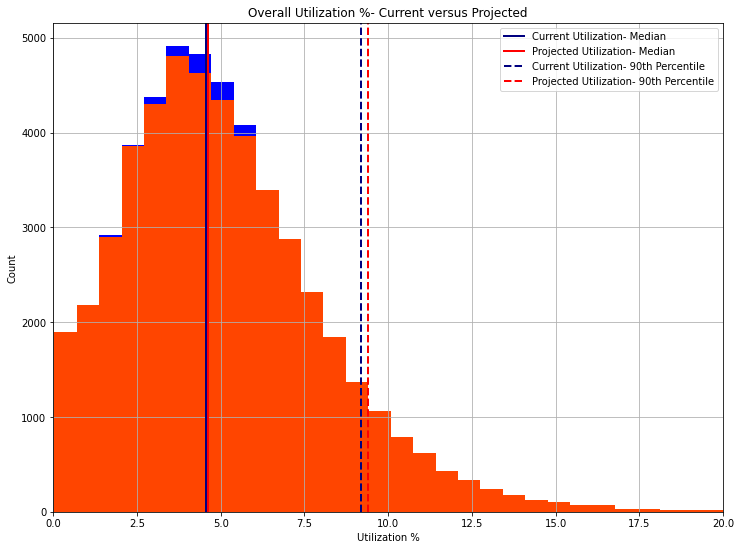

,count,mean,std,min,50%,90%,max
Projected_Utilization,96568.0,5.161950,3.296397,0.02,4.63,9.39,47.78
Overall_Utilization,96568.0,5.070966,3.183450,0.02,4.57,9.19,47.78


In [ ]:
plt.figure(figsize=(12,9))
df1.groupby(['room_id'])['Overall_Utilization'].median().hist(color='blue', bins=50,log=False, histtype='bar')
df1.groupby(['room_id'])['Projected_Utilization'].median().hist(color='orangered', bins=50,log=False, histtype='bar')
plt.xlim(0,20)
plt.title('Overall Utilization %- Current versus Projected')
plt.xlabel('Utilization %')
plt.ylabel('Count')
plt.axvline(df1.Overall_Utilization.median(), color='navy', linestyle='solid', linewidth=2, label= 'Current Utilization- Median')
plt.axvline(df1.Projected_Utilization.median(), color='red', linestyle='solid', linewidth=2, label= 'Projected Utilization- Median')
plt.axvline(df1.Overall_Utilization.describe(percentiles=[.9]).loc['90%'], color='navy', linestyle='dashed', linewidth=2, label= 'Current Utilization- 90th Percentile')
plt.axvline(df1.Projected_Utilization.describe(percentiles=[.9]).loc['90%'], color='red', linestyle='dashed', linewidth=2, label= 'Projected Utilization- 90th Percentile')
# plt.axvline(df.Overall_Utilization.median(), color='brown', linestyle='solid', linewidth=1.5)
# plt.axvline(df.Overall_Utilization.describe(percentiles=[.9]).loc['90%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df1[['Projected_Utilization', 'Overall_Utilization']].describe(percentiles=[.90]).T
# df1[['Projected_Utilization', 'Overall_Utilization']].describe(percentiles=[.90]).T

In [ ]:
df1[['Projected_Utilization', 'Overall_Utilization']].describe(percentiles=[.90]).T

,count,mean,std,min,50%,90%,max
Projected_Utilization,96568.0,5.161950,3.296397,0.02,4.63,9.39,47.78
Overall_Utilization,96568.0,5.070966,3.183450,0.02,4.57,9.19,47.78


## Using Machine Multiplier

In [ ]:
df1['Projected_Utilization']= df1.Overall_Utilization.divide(df1.mult)

In [ ]:
df1[['Projected_Utilization', 'Overall_Utilization']].describe(percentiles=[.90]).T

,count,mean,std,min,50%,90%,max
Projected_Utilization,96568.0,5.531941,3.362224,0.02,5.08,9.81,47.78
Overall_Utilization,96568.0,5.070966,3.183450,0.02,4.57,9.19,47.78


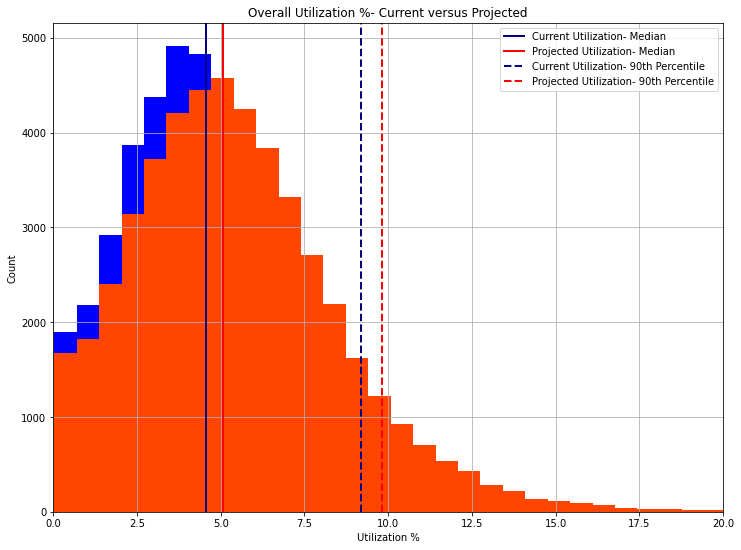

,count,mean,std,min,50%,90%,max
Projected_Utilization,96568.0,5.531941,3.362224,0.02,5.08,9.81,47.78
Overall_Utilization,96568.0,5.070966,3.183450,0.02,4.57,9.19,47.78


In [ ]:
plt.figure(figsize=(12,9))
df1.groupby(['room_id'])['Overall_Utilization'].median().hist(color='blue', bins=50,log=False, histtype='bar')
df1.groupby(['room_id'])['Projected_Utilization'].median().hist(color='orangered', bins=50,log=False, histtype='bar')
plt.xlim(0,20)
plt.title('Overall Utilization %- Current versus Projected')
plt.xlabel('Utilization %')
plt.ylabel('Count')
plt.axvline(df1.Overall_Utilization.median(), color='navy', linestyle='solid', linewidth=2, label= 'Current Utilization- Median')
plt.axvline(df1.Projected_Utilization.median(), color='red', linestyle='solid', linewidth=2, label= 'Projected Utilization- Median')
plt.axvline(df1.Overall_Utilization.describe(percentiles=[.9]).loc['90%'], color='navy', linestyle='dashed', linewidth=2, label= 'Current Utilization- 90th Percentile')
plt.axvline(df1.Projected_Utilization.describe(percentiles=[.9]).loc['90%'], color='red', linestyle='dashed', linewidth=2, label= 'Projected Utilization- 90th Percentile')
# plt.axvline(df.Overall_Utilization.median(), color='brown', linestyle='solid', linewidth=1.5)
# plt.axvline(df.Overall_Utilization.describe(percentiles=[.9]).loc['90%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
# plt.axvline(df.Overall_Utilization.describe().loc['mean']-3*df.UtilTimeFrame.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
df1[['Projected_Utilization', 'Overall_Utilization']].describe(percentiles=[.90]).T

# Median Optimization

In [ ]:
df1.columns

Index(['Reporting_level', 'vendor', 'as400id', 'location_id', 'Location_Name',
       'Branch_Id', 'Branch_Name', 'state', 'room_id', 'machine_type',
       'TimeSinceFirstVend', 'TimeSinceLastTxn', 'Tenure_Flag',
       'Txn_Avg_Machine_Cnt', 'Room_Open_Hours', 'Daily_Max_Room_Vend_Hours',
       'Base_Vends', 'Base_Vend_Amount', 'Top_Up_Vends', 'Top_Up_Vend_Amount',
       'Total_Vend_Hours', 'Total_Hours_Open', 'Overall_Utilization',
       'Max_Daily_Vends', 'Daily_Peak_Utilization',
       'Full_Room_Util_Gross_Hours', 'Full_Room_Util_Vend_PCT',
       'Full_Room_Util_Total_PCT', 'Avg_Daily_Vends', 'VDPM', 'Vend_Price',
       'AvgUtil_M', 'AvgUtil_T', 'AvgUtil_W', 'AvgUtil_Th', 'AvgUtil_F',
       'AvgUtil_Sa', 'AvgUtil_Su', 'nrpm', 'ContractExpirationDate',
       'Days_To_ContractExpiration', 'UtilTimeFrame', 'UtilTimeFrame_bkt',
       'machine_bkt', 'overall_util_bkt', 'peak_util_bkt', 'nrpm_bkt',
       'VDPM_bkt', 'score', 'Overall_Utilization_median',
       'Daily_Peak_Ut

## Algorithm for Median value optimization

- Take ratio of Overall_Utilization/ Overall_Utilization_median
  - If > 1 set to 1
- Take ratio of Daily_Peak_Utilization/ Daily_Peak_Utilization_q90_ratio
  - If > 1 set to 1
- Pick max of 2 ratios
- 

In [ ]:
df1.Daily_Peak_Utilization_q90_ratio= np.where(df1.Daily_Peak_Utilization/ df1.Daily_Peak_Utilization_q90 > 1, 1, df1.Daily_Peak_Utilization/ df1.Daily_Peak_Utilization_q90)

In [ ]:
df1.Daily_Peak_Utilization_q90_ratio.describe()

count    96568.000000
mean         0.620839
std          0.215891
min          0.062580
25%          0.456643
50%          0.597015
75%          0.777134
max          1.000000
Name: Daily_Peak_Utilization_q90_ratio, dtype: float64

In [ ]:
df1['Overall_Utilization_median_ratio']= df1.Overall_Utilization.divide(df1.Overall_Utilization_median)

In [ ]:
df1['Overall_Utilization_median_ratio']= np.where(df1.Overall_Utilization_median_ratio > 1, 1, df1.Overall_Utilization_median_ratio)

In [ ]:
df1.Overall_Utilization_median_ratio.describe()

count    96568.000000
mean         0.797423
std          0.275058
min          0.004739
25%          0.628319
50%          1.000000
75%          1.000000
max          1.000000
Name: Overall_Utilization_median_ratio, dtype: float64

In [ ]:
df1['NewMult']= df1.loc[df1.score==1111][['Overall_Utilization_median_ratio', 'Daily_Peak_Utilization_q90_ratio']].max(axis=1)

In [ ]:
df1.NewMult.describe()

count    35693.000000
mean         0.778397
std          0.234908
min          0.087743
25%          0.587894
50%          0.849123
75%          1.000000
max          1.000000
Name: NewMult, dtype: float64

In [ ]:
df1.loc[df1.score!=1111, 'NewMult']= 1

In [ ]:
df1['ExplMcs']= np.ceil(df1.NewMult*df1.Txn_Avg_Machine_Cnt)

In [ ]:
df1['ExplOverallUtil']= df1.Overall_Utilization*df1.Txn_Avg_Machine_Cnt.divide(df1.ExplMcs)

In [ ]:
df1[['Overall_Utilization', 'ExplOverallUtil']].describe()

,Overall_Utilization,ExplOverallUtil
count,96568.000000,96568.000000
mean,5.070966,5.170795
std,3.183450,3.107195
min,0.020000,0.020000
25%,2.800000,3.040000
50%,4.570000,4.630000
75%,6.750000,6.750000
max,47.780000,47.780000


# File Cut

In [ ]:
df2= df1.copy(deep= True)

In [ ]:
df2.rename({'segment': 'segmentClass', 'score': 'segment'}, inplace= True)

In [ ]:
df2.columns

Index(['Reporting_level', 'vendor', 'as400id', 'location_id', 'Location_Name',
       'Branch_Id', 'Branch_Name', 'state', 'room_id', 'machine_type',
       'TimeSinceFirstVend', 'TimeSinceLastTxn', 'Tenure_Flag',
       'Txn_Avg_Machine_Cnt', 'Room_Open_Hours', 'Daily_Max_Room_Vend_Hours',
       'Base_Vends', 'Base_Vend_Amount', 'Top_Up_Vends', 'Top_Up_Vend_Amount',
       'Total_Vend_Hours', 'Total_Hours_Open', 'Overall_Utilization',
       'Max_Daily_Vends', 'Daily_Peak_Utilization',
       'Full_Room_Util_Gross_Hours', 'Full_Room_Util_Vend_PCT',
       'Full_Room_Util_Total_PCT', 'Avg_Daily_Vends', 'VDPM', 'Vend_Price',
       'AvgUtil_M', 'AvgUtil_T', 'AvgUtil_W', 'AvgUtil_Th', 'AvgUtil_F',
       'AvgUtil_Sa', 'AvgUtil_Su', 'nrpm', 'ContractExpirationDate',
       'Days_To_ContractExpiration', 'UtilTimeFrame', 'UtilTimeFrame_bkt',
       'machine_bkt', 'overall_util_bkt', 'peak_util_bkt', 'nrpm_bkt',
       'VDPM_bkt', 'score', 'Overall_Utilization_median',
       'Daily_Peak_Ut

In [ ]:
df3= df2.groupby(['as400id', 'machine_type']).agg({'Txn_Avg_Machine_Cnt':'sum', 'FinalMachines': 'sum'}).reset_index()

In [ ]:
df4= df3.pivot(index= 'as400id', columns='machine_type', values=['Txn_Avg_Machine_Cnt', 'FinalMachines']).fillna(0).reset_index()

In [ ]:
df4.columns= ['as400id', 'C_DRYER', 'C_STACKED', 'C_WASHER', 'R_DRYER', 'R_STACKED', 'R_WASHER']

In [ ]:
df4['C_ALL']= df4[['C_DRYER', 'C_STACKED', 'C_WASHER']].sum(axis=1)

In [ ]:
df4['R_ALL']= df4[['R_DRYER', 'R_STACKED', 'R_WASHER']].sum(axis=1)

In [ ]:
df4['WasherSuggested']= df4.R_STACKED+ df4.R_WASHER
df4['DryerSuggested']= df4.R_STACKED+ df4.R_DRYER

In [ ]:
df4['RightsizeSegmentation']= np.where(df4.C_ALL > df4.R_ALL, 'Recommended for Rightsizing', 'No Recommendation')

In [ ]:
df4[['as400id', 'RightsizeSegmentation', 'WasherSuggested', 'DryerSuggested']].to_csv('DFORE380.csv')

In [ ]:
df4.RightsizeSegmentation.value_counts()

No Recommendation              21158
Recommended for Rightsizing     2293
Name: RightsizeSegmentation, dtype: int64

# Early

In [ ]:
buckets= ['Tenure_Flag','UtilTimeFrame_bkt',
 'machine_bkt',
 'overall_util_bkt',
 'peak_util_bkt',
 'VDPM_bkt']

In [ ]:
# df.groupby(buckets).agg({'Txn_Avg_Machine_Cnt':'sum', 'Overall_Utilization':'mean', 'Daily_Peak_Utilization': 'mean', 'VDPM': 'mean'})

In [ ]:
buckets1= ['vendor', 'machine_type','Tenure_Flag','UtilTimeFrame_bkt', 'machine_bkt', 'overall_util_bkt','peak_util_bkt']

In [ ]:
df.groupby(buckets1).agg({'Txn_Avg_Machine_Cnt':'sum', 'Overall_Utilization':'median', 'Daily_Peak_Utilization': 'median', 'VDPM': 'median'}).sort_values('Overall_Utilization', ascending= True)

Txn_Avg_Machine_Cnt  ...        VDPM
vendor machine_type Tenure_Flag UtilTimeFrame_bkt machine_bkt overall_util_bkt peak_util_bkt                       ...            
CSCGo  WASHER       1           1                 0           1                1                              614  ...    1.214107
       DRYER        1           1                 0           1                1                              513  ...    1.157282
       STACKED      1           1                 0           1                1                               11  ...    1.214243
DI     DRYER        1           1                 0           1                1                              270  ...    1.810714
       WASHER       1           1                 0           1                1                              353  ...    4.098250
...                                                                                                           ...  ...         ...
CSCGo  WASHER       0           0                 1           0                0                               22  ...  182.520000
DI     DRYER        0           0                 1           0                0                               22  ...  220.001785
CSCGo  WASHER       0           1                 0           0                0                                1  ...   73.616400
DI     STACKED      1           0                 1           0                0                               60  ...  516.185150
CSCGo  STACKED      1           0                 0           0                0                                3  ...  132.022800

[131 rows x 4 columns]

In [ ]:
df.grooupby([''])

In [ ]:
df.groupby(buckets1).agg({'Txn_Avg_Machine_Cnt':'sum', 'Overall_Utilization':'median', 'Daily_Peak_Utilization': 'median', 'VDPM': 'median'}).sort_index(ascending=False)

Txn_Avg_Machine_Cnt  ...        VDPM
vendor machine_type Tenure_Flag UtilTimeFrame_bkt machine_bkt overall_util_bkt peak_util_bkt                       ...            
DI     WASHER       1           1                 1           1                1                              361  ...  147.727125
                                                  0           1                1                              959  ...   11.154000
                                                                               0                              115  ...   22.561500
                                                              0                0                                2  ...  732.403750
                                0                 1           1                1                            23207  ...  555.418500
...                                                                                                           ...  ...         ...
CSCGo  DRYER        0           0                 1           0                1                              221  ...  753.024631
                                                  0           1                1                             1121  ...   73.427586
                                                                               0                              113  ...   43.952803
                                                              0                1                               68  ...  184.193100
                                                                               0                               86  ...   77.607214

[100 rows x 4 columns]

In [ ]:
df.groupby(buckets1).agg({'Txn_Avg_Machine_Cnt':'sum', 'Overall_Utilization':'median', 'Daily_Peak_Utilization': 'median', 'VDPM': 'median'}).sort_index(ascending=False)

Txn_Avg_Machine_Cnt  ...        VDPM
Tenure_Flag UtilTimeFrame_bkt machine_bkt overall_util_bkt peak_util_bkt                       ...            
1           1                 1           1                1                             1552  ...   83.097300
                              0           1                1                             5207  ...    4.036173
                                                           0                              815  ...   12.876647
                                          0                0                               10  ...   97.684442
            0                 1           1                1                            55138  ...  441.935000
                                          0                1                            21267  ...  809.657875
                              0           1                1                           107321  ...   89.317398
                                                           0                            17726  ...   62.778529
                                          0                1                             2980  ...  296.806250
                                                           0                             7897  ...  173.267250
0           1                 1           1                1                              159  ...   21.728571
                                          0                1                                6  ...  675.155000
                              0           1                1                              726  ...   10.647000
                                                           0                               58  ...   26.617500
                                          0                1                                2  ...   48.662946
                                                           0                               14  ...   73.616400
            0                 1           1                1                             1605  ...  374.271625
                                          0                1                              405  ...  822.019017
                              0           1                1                             2913  ...   79.595100
                                                           0                              256  ...   44.843275
                                          0                1                              151  ...  212.940000
                                                           0                              196  ...   84.515089

[22 rows x 4 columns]

In [ ]:
df.machine_type.unique()

array(['DRYER', 'WASHER', 'STACKED'], dtype=object)